#Spaceship Titanic



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



**To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.**

**OBS: Metric : classification accuracy**

### 1. Import Data & Libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from plotly.subplots import make_subplots

In [8]:
data=pd.read_csv('/content/drive/MyDrive/Spaceship Titanic/train.csv')
print(data.info())
print('-'*60)
print('\n# Null Values #\n')
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
------------------------------------------------------------

# Null Values #

PassengerId       0
HomePlanet      201
CryoSleep       21

* Quantitative nullified features: Age, RoomService, FoodCourt, ShoppingMall, VRDeck

* Qualitative nullified features: HomePlanet, Cabin, Destination, Name, VIP, CryoSleep








## 2. Data Preprocessing


### 2.1 Qualitative features



In [14]:
def calculate_ratios(data, total_value):
    counts = np.array(data.value_counts().head(5))
    counts = counts[~np.isnan(counts)]
    k = total_value / np.sum(counts)
    scaled_values = k * counts
    rounded_values = np.round(scaled_values).astype(int)
    difference = total_value - np.sum(rounded_values)

    if difference != 0:
        adjustment_indices = np.argsort(scaled_values - rounded_values)
        for i in range(abs(difference)):
            index = adjustment_indices[i] if difference > 0 else adjustment_indices[-(i+1)]
            rounded_values[index] += 1 if difference > 0 else -1

    return rounded_values

def pre_processing_data(data):
    total_count= data.isna().sum()
    ratios = calculate_ratios(data, total_count)

    df = data.value_counts().head(5).index
    df_ratios = pd.DataFrame({
        'x': df,
        'Ratio': ratios
    })

    values_to_add = []
    for i, row in df_ratios.iterrows():
        values_to_add.extend([row['x']] * row['Ratio'])

    random.shuffle(values_to_add)

    return values_to_add



def print_stats (data):
  print(data.value_counts().head(5))
  print(f'missing values : {data.isna().sum()}')
  print('*'*60)



1.   ```def_ratios()```  is a function that calculates the proportion of data and indicates the extent to which null values will be replaced.




2.  ```pre_processing_data()``` selects the values from `def_ratios()` and replaces them in the DataFrame.




In [15]:
print_stats(data.HomePlanet)
print_stats(data.Cabin)
print_stats(data.Destination)
print_stats(data.CryoSleep)
print_stats(data.VIP)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
missing values : 201
************************************************************
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
Name: count, dtype: int64
missing values : 199
************************************************************
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
missing values : 182
************************************************************
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
missing values : 217
************************************************************
VIP
False    8291
True      199
Name: count, dtype: int64
missing values : 203
************************************************************


In [16]:
data.loc[data['HomePlanet'].isna(),'HomePlanet']= pre_processing_data(data.HomePlanet)
data.loc[data['Cabin'].isna(),'Cabin']= pre_processing_data(data.Cabin)
data.loc[data['Destination'].isna(),'Destination']=pre_processing_data(data.Destination)
data.loc[data['CryoSleep'].isna(),'CryoSleep']=pre_processing_data(data.CryoSleep)
data.loc[data['VIP'].isna(),'VIP']=pre_processing_data(data.VIP)

print_stats(data.HomePlanet)
print_stats(data.Cabin)
print_stats(data.Destination)
print_stats(data.CryoSleep)
print_stats(data.VIP)

HomePlanet
Earth     4711
Europa    2181
Mars      1801
Name: count, dtype: int64
missing values : 0
************************************************************
Cabin
G/734/S     51
G/109/P     46
B/201/P     46
G/981/S     46
G/1368/P    46
Name: count, dtype: int64
missing values : 0
************************************************************
Destination
TRAPPIST-1e      6041
55 Cancri e      1838
PSO J318.5-22     814
Name: count, dtype: int64
missing values : 0
************************************************************
CryoSleep
False    5578
True     3115
Name: count, dtype: int64
missing values : 0
************************************************************
VIP
False    8489
True      204
Name: count, dtype: int64
missing values : 0
************************************************************


In [17]:
data['Deck']=data['Cabin'].str.split('/').str[0]
data['Num']=data['Cabin'].str.split('/').str[1]
data['Num']=data['Num'].astype(int)
data['Side']=data['Cabin'].str.split('/').str[2]



After handling the null values in `Deck`, I subdivide `Deck` into `Cabin`, `Num`, and `Side` for more accurate EDA.








### 2.2 Quantitative features

CryoSleep, Age, VIP, RoomService,FoodCourt, ShoppingMall, VRDeck

In [18]:
print(data.isna().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64


In [19]:
fig2=px.box(data,x='Age')
fig4=px.box(data,x='RoomService')
fig5=px.box(data,x='FoodCourt')
fig6=px.box(data,x='ShoppingMall')
fig7=px.box(data,x='VRDeck')
fig8=px.box(data,x='Spa')
fig = make_subplots(rows=2,cols=3,subplot_titles=('Age','Room Service','Food Court','Shopping Mall','VR Deck', 'SPA'))


for trace in fig2.data:
  fig.add_trace(trace,row=1,col=1)


for trace in fig4.data:
  fig.add_trace(trace,row=1,col=2)

for trace in fig5.data:
  fig.add_trace(trace,row=1,col=3)

for trace in fig6.data:
  fig.add_trace(trace,row=2,col=1)

for trace in fig7.data:
  fig.add_trace(trace,row=2,col=2)

for trace in fig8.data:
  fig.add_trace(trace,row=2,col=3)

fig

In [20]:
def fill_na_num(data):
  for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
      mean = data[col].mean()
      data[col] = data[col].fillna(mean)



fill_na_num(data)

For all numerical variables that were not treated with the proportions, I replace the null values with the median.

In [25]:
data[['VIP','CryoSleep','Transported']]=data[['VIP','CryoSleep','Transported']].apply(lambda x: x.astype(int))


##3. EDA

### 3.1  Questions to be answered


Passenger Distribution:
  1. How does the distribution of passengers vary between those who were transported to the alternate dimension and those who remained?


Trip Characteristics:
  1. How do the characteristics of the trip (e.g., cabin class, cabin type) influence the probability of a passenger being transported to another dimension?
  2. Is there any relationship between the passenger's position on board and the probability of being transported?



In [ ]:
px.histogram(data,x='Age',color='Transported',barmode='group')

Right away, it is noticeable that up to the age of 12, the proportion of those transported is much higher than those who were not transported.

In [ ]:
px.histogram(data,x='VIP',color='Transported', barmode='group')

In [ ]:
px.histogram(data,x='CryoSleep',color='Transported', barmode='group')

It is notable that passengers in CryoSleep have a much higher chance of being transported.

In [28]:
fig1= px.histogram(data,x='Age')
fig2=px.histogram(data,x='Age',y='Spa')
fig3=px.histogram(data,x='Age',y='RoomService')
fig4=px.histogram(data,x='Age',y='VRDeck')
fig5=px.histogram(data,x='Age',y='ShoppingMall')
fig6=px.histogram(data,x='Age',y='FoodCourt')

fig=make_subplots(rows=2,cols=3, subplot_titles=('Age x Count','Age x Spa','Age x Food Service','Age x VRDeck','Age x ShoppingMall','Age x FoodCourt'))

for trace in fig1.data:
  fig.add_trace(trace,row=1,col=1)
for trace in fig2.data:
  fig.add_trace(trace,row=1,col=2)
for trace in fig3.data:
  fig.add_trace(trace,row=2,col=1)

for trace in fig4.data:
  fig.add_trace(trace,row=2,col=2)

for trace in fig5.data:
  fig.add_trace(trace,row=1,col=3)

for trace in fig6.data:
  fig.add_trace(trace,row=2,col=3)


fig

It is noticeable that the distribution of variables related to age is highly concentrated in the 20-40 year age range.

In [ ]:
px.histogram(data,x='Deck',color='Transported',barmode='group')

In [ ]:
px.histogram(data,x='Side',color='Transported',barmode='group')

Passengers on the S side have a higher probability of being transported compared to passengers on the P side.

Regarding the Deck, people in B and C have a higher chance of being transported.

## 4. Modelagem

In [29]:
data_dummies=data.drop(columns=['PassengerId','Cabin','Name'])
data_dummies=pd.get_dummies(data_dummies)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   Num                        8693 non-null   int64  
 10  HomePlanet_Earth           8693 non-null   bool   
 11  HomePlanet_Europa          8693 non-null   bool   
 12  HomePlanet_Mars            8693 non-null   bool   
 13  Destination_55 Cancri e    8693 non-null   bool 

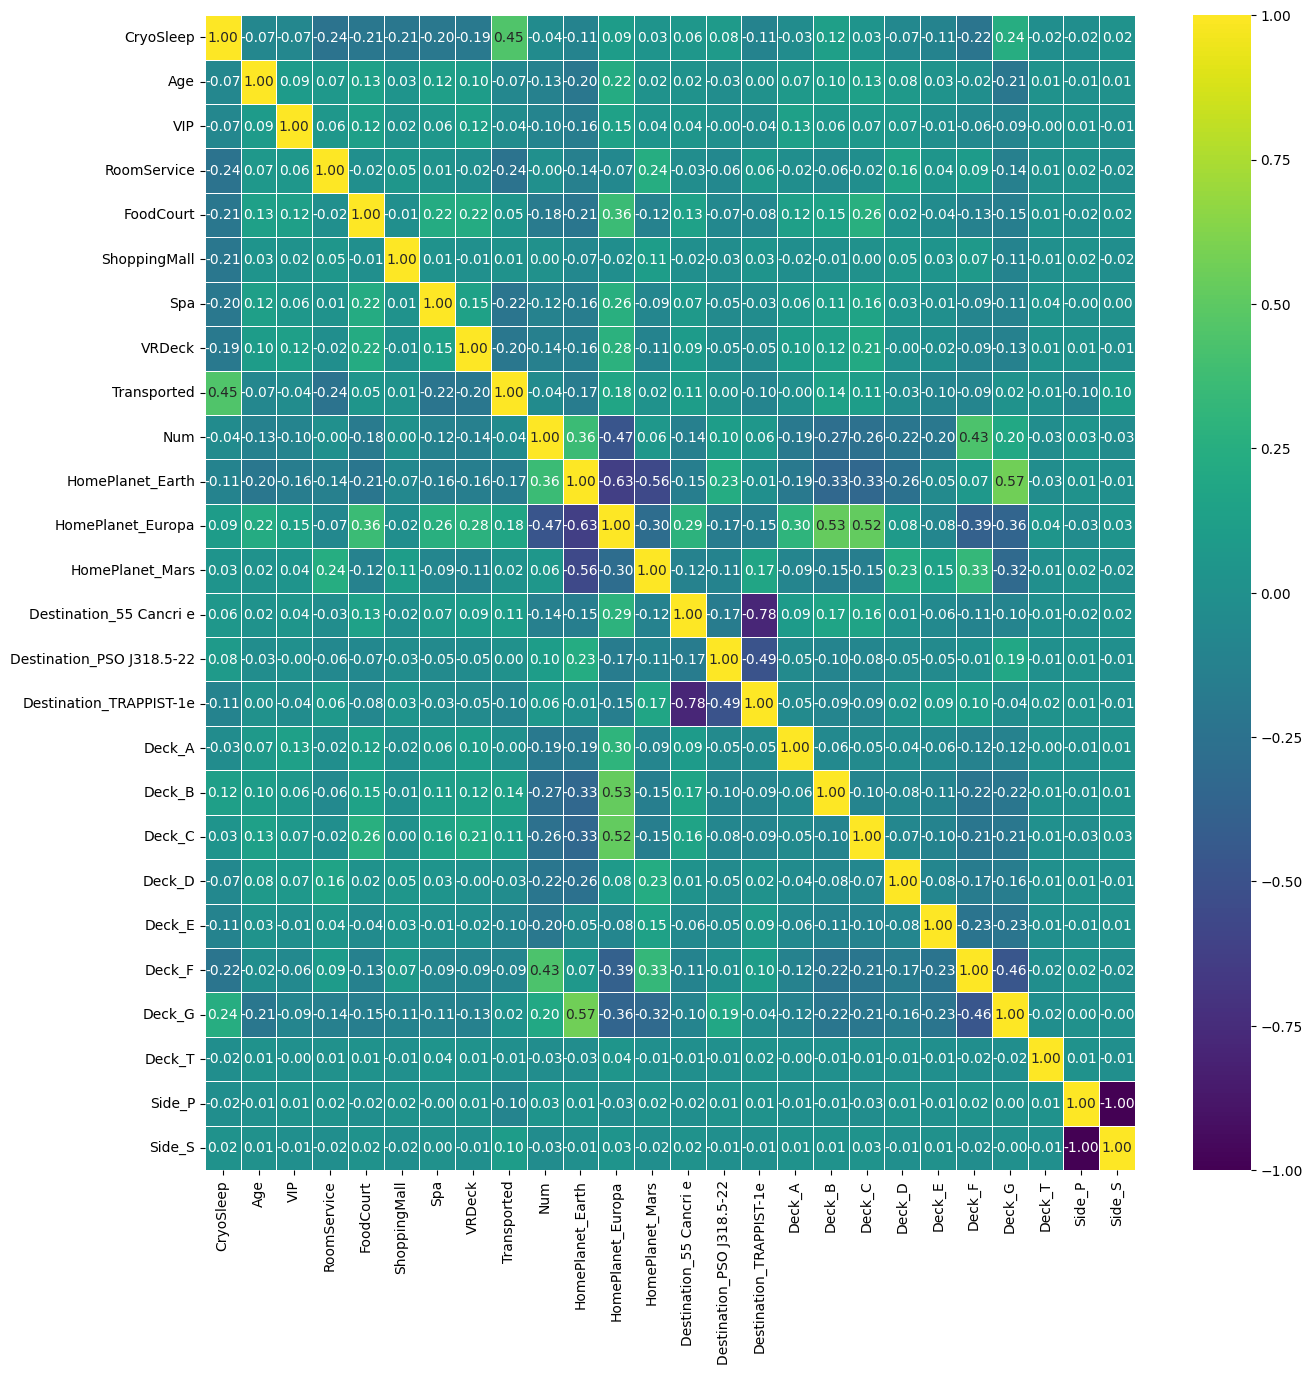

In [30]:
matrix=data_dummies.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.show()

### 3.1 Cross-Validation

In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score , recall_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)

In [32]:
x=data_dummies.drop(columns=['Transported'])
y=data_dummies['Transported']

In [33]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGB':XGBClassifier()
}

results = {model_name: {'accuracy': [], 'recalls': [], 'precisions': []} for model_name in models}

In [37]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      accuracy= accuracy_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred,average='macro')
      precision = precision_score(y_test, y_pred, average='weighted')

      results[model_name]['accuracy'].append(accuracy)
      results[model_name]['recalls'].append(recall)
      results[model_name]['precisions'].append(precision)

for model_name, metrics in results.items():
    accuracies = np.array(metrics['accuracy'])
    recalls = np.array(metrics['recalls'])
    precisions = np.array(metrics['precisions'])

    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_recalls = np.mean(recalls)
    std_recalls = np.std(recalls)
    mean_precisions = np.mean(precisions)
    std_precisions = np.std(precisions)

    print(f'-----{model_name}--------')
    print(f'Accuracy mean: {mean_accuracy:.4f} ; Accuracy std: {std_accuracy:.4f}')
    print(f'Recall mean: {mean_recalls:.4f} ; Recall std: {std_recalls:.4f}')
    print(f'Precision mean: {mean_precisions:.4f} ; Precision std: {std_precisions:.4f}')
    print("-" * 60)

-----LogisticRegression--------
Accuracy mean: 0.7875 ; Accuracy std: 0.0079
Recall mean: 0.7874 ; Recall std: 0.0078
Precision mean: 0.7881 ; Precision std: 0.0081
------------------------------------------------------------
-----DecisionTreeClassifier--------
Accuracy mean: 0.7450 ; Accuracy std: 0.0124
Recall mean: 0.7450 ; Recall std: 0.0123
Precision mean: 0.7451 ; Precision std: 0.0124
------------------------------------------------------------
-----RandomForestClassifier--------
Accuracy mean: 0.7979 ; Accuracy std: 0.0124
Recall mean: 0.7982 ; Recall std: 0.0123
Precision mean: 0.7998 ; Precision std: 0.0119
------------------------------------------------------------
-----SVC--------
Accuracy mean: 0.7844 ; Accuracy std: 0.0038
Recall mean: 0.7838 ; Recall std: 0.0037
Precision mean: 0.7934 ; Precision std: 0.0048
------------------------------------------------------------
-----KNeighborsClassifier--------
Accuracy mean: 0.7592 ; Accuracy std: 0.0040
Recall mean: 0.7590 ; Re

Since XGBoost and Random Forest Classifier performed the best, I will conduct tests for both of them

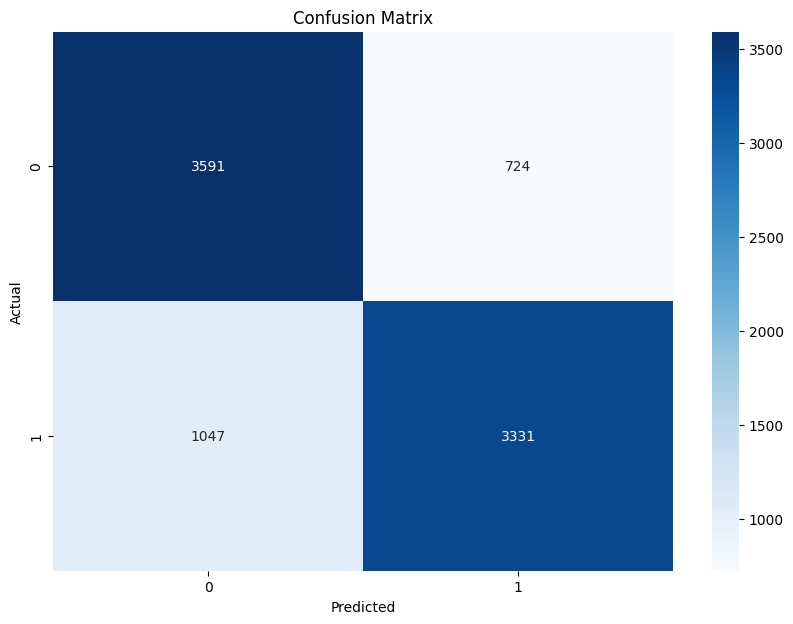

In [ ]:
y_real = []
y_pred = []

for train_index, test_index in kf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)

    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

cm = confusion_matrix(y_real, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 4. Testing


### 4.1 Import data & Preprocessing

In [50]:
test=pd.read_csv('/content/drive/MyDrive/Spaceship Titanic/test.csv')


In [51]:
print_stats(test.HomePlanet)
print_stats(test.Cabin)
print_stats(test.Destination)
print_stats(test.CryoSleep)
print_stats(test.VIP)

HomePlanet
Earth     2263
Europa    1002
Mars       925
Name: count, dtype: int64
missing values : 87
************************************************************
Cabin
G/160/P    8
D/273/S    7
B/31/P     7
G/748/S    7
E/228/S    7
Name: count, dtype: int64
missing values : 100
************************************************************
Destination
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: count, dtype: int64
missing values : 92
************************************************************
CryoSleep
False    2640
True     1544
Name: count, dtype: int64
missing values : 93
************************************************************
VIP
False    4110
True       74
Name: count, dtype: int64
missing values : 93
************************************************************


In [52]:
test.loc[test['HomePlanet'].isna(),'HomePlanet']= pre_processing_data(test.HomePlanet)
test.loc[test['Cabin'].isna(),'Cabin']= pre_processing_data(test.Cabin)
test.loc[test['Destination'].isna(),'Destination']=pre_processing_data(test.Destination)
test.loc[test['CryoSleep'].isna(),'CryoSleep']=pre_processing_data(test.CryoSleep)
test.loc[test['VIP'].isna(),'VIP']=pre_processing_data(test.VIP)

print_stats(test.HomePlanet)
print_stats(test.Cabin)
print_stats(test.Destination)
print_stats(test.CryoSleep)
print_stats(test.VIP)

HomePlanet
Earth     2310
Europa    1023
Mars       944
Name: count, dtype: int64
missing values : 0
************************************************************
Cabin
G/160/P    31
D/273/S    27
G/748/S    26
E/228/S    26
B/31/P     26
Name: count, dtype: int64
missing values : 0
************************************************************
Destination
TRAPPIST-1e      3021
55 Cancri e       859
PSO J318.5-22     397
Name: count, dtype: int64
missing values : 0
************************************************************
CryoSleep
False    2699
True     1578
Name: count, dtype: int64
missing values : 0
************************************************************
VIP
False    4201
True       76
Name: count, dtype: int64
missing values : 0
************************************************************


In [53]:
test['Deck']=test['Cabin'].str.split('/').str[0]
test['Num']=test['Cabin'].str.split('/').str[1]
test['Num']=test['Num'].astype(int)
test['Side']=test['Cabin'].str.split('/').str[2]


In [54]:
fill_na_num(test)

In [55]:
test[['VIP','CryoSleep']]=test[['VIP','CryoSleep']].apply(lambda x: x.astype(int))

In [56]:
test_dummies=test.drop(columns=['PassengerId','Cabin','Name'])
test_dummies=pd.get_dummies(test_dummies)
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   Num                        4277 non-null   int64  
 9   HomePlanet_Earth           4277 non-null   bool   
 10  HomePlanet_Europa          4277 non-null   bool   
 11  HomePlanet_Mars            4277 non-null   bool   
 12  Destination_55 Cancri e    4277 non-null   bool   
 13  Destination_PSO J318.5-22  4277 non-null   bool 

### 4.2 RandomForestClassifier - Testing

In [57]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(test_dummies)

y_pred = pd.DataFrame(y_pred, columns=['Transported'])

submission = pd.merge(test, y_pred, left_index=True, right_index=True)

submission=submission[['PassengerId','Transported']]

submission['Transported']=submission['Transported'].apply(lambda x : True if x==1 else False)


submission.to_csv('RandomForest.csv',index=False)

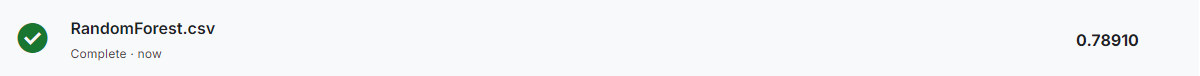

### 4.3 XGB - Testing

In [59]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(test_dummies)

y_pred = pd.DataFrame(y_pred, columns=['Transported'])

submission = pd.merge(test, y_pred, left_index=True, right_index=True)

submission=submission[['PassengerId','Transported']]

submission['Transported']=submission['Transported'].apply(lambda x : True if x==1 else False)


submission.to_csv('XGB.csv',index=False)

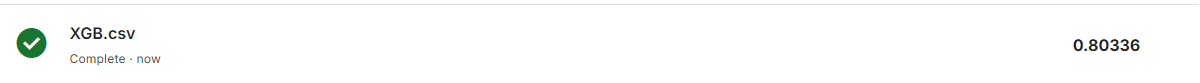

## 5. Tuning XGBoost hyperparameters with Optuna

In [67]:
def objective(trial):
  param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5)
    }
  model = XGBClassifier(**param)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  accuracy = accuracy_score(y_test, preds)
  return accuracy

In [71]:
study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=600)
print(f"Best trial: {study.best_trial.params}")
print(f"Best accuracy: {study.best_value}")


[I 2024-08-10 12:52:00,673] A new study created in memory with name: no-name-0bb78432-6321-4b0b-9df6-8c5d620e5b9d
[I 2024-08-10 12:52:02,811] Trial 0 finished with value: 0.7974683544303798 and parameters: {'max_depth': 6, 'learning_rate': 0.02573504161955769, 'n_estimators': 467, 'subsample': 0.6274888346074574, 'colsample_bytree': 0.8883838367050683, 'gamma': 3.791155956765007}. Best is trial 0 with value: 0.7974683544303798.
[I 2024-08-10 12:52:04,260] Trial 1 finished with value: 0.7882623705408516 and parameters: {'max_depth': 7, 'learning_rate': 0.12397968940264838, 'n_estimators': 379, 'subsample': 0.5748339981822326, 'colsample_bytree': 0.547223353322861, 'gamma': 4.107994984534944}. Best is trial 0 with value: 0.7974683544303798.
[I 2024-08-10 12:52:05,582] Trial 2 finished with value: 0.786536248561565 and parameters: {'max_depth': 6, 'learning_rate': 0.2031533321120999, 'n_estimators': 147, 'subsample': 0.6449434843667639, 'colsample_bytree': 0.576048679182867, 'gamma': 4.64

Best trial: {'max_depth': 10, 'learning_rate': 0.08611566172762596, 'n_estimators': 89, 'subsample': 0.781335690154546, 'colsample_bytree': 0.5457359753424653, 'gamma': 2.335769838348872}
Best accuracy: 0.8118527042577676


In [74]:
model=XGBClassifier(**study.best_trial.params)
model.fit(X_train,y_train)
y_pred = model.predict(test_dummies)

y_pred = pd.DataFrame(y_pred, columns=['Transported'])

submission = pd.merge(test, y_pred, left_index=True, right_index=True)

submission=submission[['PassengerId','Transported']]

submission['Transported']=submission['Transported'].apply(lambda x : True if x==1 else False)


submission.to_csv('XGB-Tunned.csv',index=False)

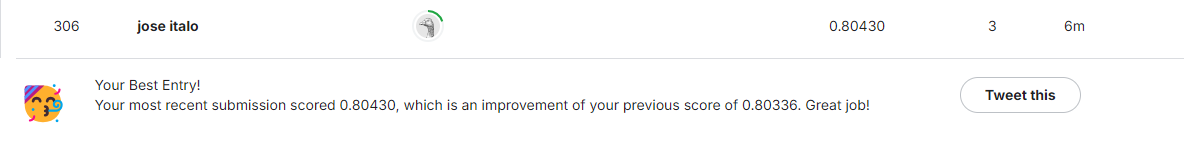